# IMPORTING NECESSARY MODULES

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt  #For Visualisation
%matplotlib inline
import seaborn as sns  #For Visualisation
from bs4 import BeautifulSoup  # For Text Parsing

# IMPORTING DATASET

In [ ]:
data = pd.read_csv('Reviews.csv')
data

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


# DATA PREPROCESSING & VISUALISATION

In [ ]:
data.isnull().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

In [ ]:
data=data.dropna()
data.isnull().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

In [ ]:
data.shape

(568411, 10)

In [ ]:
score_unique = data['Score'].unique()
print(score_unique)

[5 1 4 2 3]


In [ ]:
#   0-> NEGATIVE REVIEW
#   1-> NEUTRAL REVIEW
#   2-> POSTIVE REVIEW
a=[]
for i in data['Score']:
    if i <3:
        a.append(0)
    if i==3:
        a.append(1)
    if i>3:
        a.append(2)

In [ ]:
r_0, r_1, r_2 = 0, 0, 0
for i in a:
    if i == 0:
        r_0 += 1
    elif i == 1:
        r_1 += 1
    else:
        r_2 += 1

print('Negative Reviews:',r_0)
print('Neutral Reviews:',r_1)
print('Positive Reviews:',r_2)

Negative Reviews: 82007
Neutral Reviews: 42638
Positive Reviews: 443766


C:\Users\Sriniketh J\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


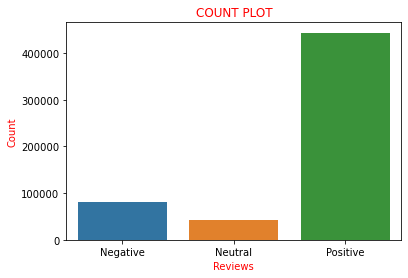

In [ ]:
sns.countplot(a)
plt.xlabel('Reviews', color = 'red')
plt.ylabel('Count', color = 'red')
plt.xticks([0,1,2],['Negative','Neutral','Positive'])
plt.title('COUNT PLOT', color = 'r')
plt.show()

In [ ]:
data['sentiment']=a
#data
final_dataset = data[['Text','sentiment']]
final_dataset

<ipython-input-10-1ac0dacbd7eb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sentiment']=a


,Text,sentiment
0,I have bought several of the Vitality canned d...,2
1,Product arrived labeled as Jumbo Salted Peanut...,0
2,This is a confection that has been around a fe...,2
3,If you are looking for the secret ingredient i...,0
4,Great taffy at a great price. There was a wid...,2
...,...,...
568449,Great for sesame chicken..this is a good if no...,2
568450,I'm disappointed with the flavor. The chocolat...,0
568451,"These stars are small, so you can give 10-15 o...",2
568452,These are the BEST treats for training and rew...,2


In [ ]:
data_p=final_dataset[data['sentiment']==2]
data_n=final_dataset[data['sentiment']==0]
len(data_p), len(data_n)

(443766, 82007)

In [ ]:
datap = data_p.iloc[np.random.randint(1,443766,5000), :]
datan = data_n.iloc[np.random.randint(1, 82007,5000), :]
len(datan), len(datap)

(5000, 5000)

In [ ]:
data = pd.concat([datap,datan])
len(data)

10000

In [ ]:
c=[]
for i in data['sentiment']:
    if i==0:
        c.append(0)
    if i==2:
        c.append(1)
data['sentiment']=c

C:\Users\Sriniketh J\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


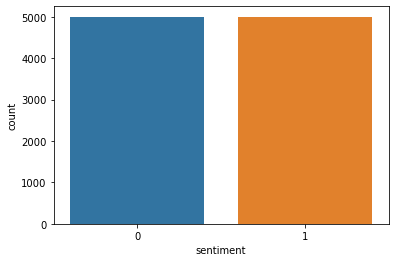

In [ ]:
sns.countplot(data['sentiment'])
plt.show()

In [ ]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()
data['review'] = data['Text'].apply(strip_html)

data=data.drop('Text',axis=1)

data.head()

,sentiment,review
72171,1,I love this stuff! The texture of this reminds...
155804,1,We found this product to surpas our expectatio...
19770,1,I have been making my son's baby food but need...
213765,1,"Smart Fries are a great, healthy snack that my..."
478296,1,I have used McCormick Spice for over 15 years ...


# MODEL BUILDING

In [ ]:
import nltk  #Natural Language Processing Toolkit
def punc_clean(text):
    import string as st
    a=[w for w in text if w not in st.punctuation]
    return ''.join(a)
data['review'] = data['review'].apply(punc_clean)
data.head(2)

,sentiment,review
72171,1,I love this stuff The texture of this reminds ...
155804,1,We found this product to surpas our expectatio...


In [ ]:
def remove_stopword(text):
    stopword=nltk.corpus.stopwords.words('english')
    stopword.remove('not')
    a=[w for w in nltk.word_tokenize(text) if w not in stopword]
    return ' '.join(a)
data['review'] = data['review'].apply(remove_stopword)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectr = TfidfVectorizer(ngram_range=(1,2),min_df=1)
vectr.fit(data['review'])

vect_X = vectr.transform(data['review'])

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

clf=model.fit(vect_X,data['sentiment'])
clf.score(vect_X,data['sentiment'])*100

96.63000000000001

# PREDICTION

In [ ]:
clf.predict(vectr.transform(['''I love ice cream''']))

array([1], dtype=int64)

In [ ]:
clf.predict(vectr.transform(['''I hate icecream''']))

array([0], dtype=int64)